In [1]:
import sinaps as sn

In [8]:
sec=list()
for i in range(2):
    sec.append(sn.Section(L=10,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.7,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0)) # mV
    sec.append(sn.Section(L=100,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.8,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0)) # mV

In [9]:
N=sn.Neuron()

N.add_section(sec[0],0,1)
N.add_section(sec[1],1,2)
N.add_section(sec[2],2,3)
N.add_section(sec[3],3,4)



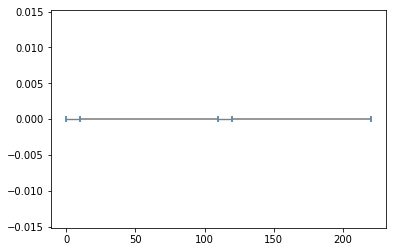

In [10]:
N.view.graph()

In [11]:
sec[0].add_channel_p(sn.channels.HeavysideCurrent(500,10,12),x = 0)

In [12]:
sec[0].add_channel_c(sn.channels.Hodgkin_Huxley())
sec[2].add_channel_c(sn.channels.Hodgkin_Huxley())

In [13]:
sec[1].add_channel_c(sn.channels.LeakChannel(0,2000))
sec[3].add_channel_c(sn.channels.LeakChannel(0,2000))

In [14]:
sec[0].dx=0.1
sec[2].dx=0.1
sec[1].dx=1
sec[3].dx=1

In [15]:
sim=sn.Simulation(N,dx=10)

In [16]:
sim.N

Neuron(sections=[{'i': 0, 'j': 1, 'obj': Section(name=140216005770488, L=10 um, a=700 nm, C_m=10 fF/μm², R_l=700 kΩ.μm), 'num': 0, 'idV': array([0, 1]), 'idS': array([0, 1])}, {'i': 1, 'j': 2, 'obj': Section(name=140216005770600, L=100 um, a=800 nm, C_m=10 fF/μm², R_l=700 kΩ.μm), 'num': 1, 'idV': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), 'idS': array([], dtype=int64)}, {'i': 2, 'j': 3, 'obj': Section(name=140216005768640, L=10 um, a=700 nm, C_m=10 fF/μm², R_l=700 kΩ.μm), 'num': 2, 'idV': array([12, 13]), 'idS': array([2, 3])}, {'i': 3, 'j': 4, 'obj': Section(name=140216005768696, L=100 um, a=800 nm, C_m=10 fF/μm², R_l=700 kΩ.μm), 'num': 3, 'idV': array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23]), 'idS': array([], dtype=int64)}])

In [17]:
max_step=0.01 #ms
t_span =(0,40)
sim.run(t_span,max_step=max_step)


In [197]:
sim.resample('0.01ms')

In [198]:
import matplotlib.pyplot as plt

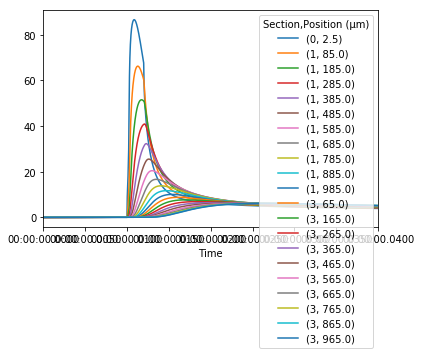

In [199]:
sim.V.loc[:,0::10].plot()

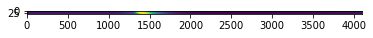

In [71]:
plt.imshow(sim.V.T)